## PCA - Principal Component Analysis
### Análisis de Componentes Principales

 - Técnica que tiene sus bases en el álgebra lineal
 - Método de extracción de características que crea combinaciones de las características originales, con la intención de que las nuevas características capturen tanta varianza (separación entre puntos) como sea posible, eliminando así redundancia.
 - Crea nuevas características al transformar los datos originales usando los valores y vectores propios calculados de la matriz de covarianza de las variables originales.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

## Conjunto de datos

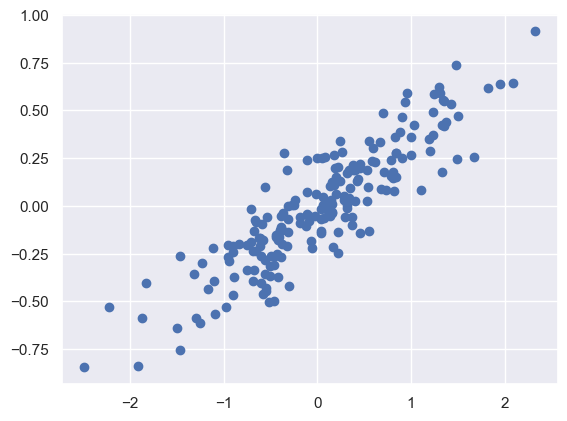

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

## Vectores y valores propios

### Los valores y vectores propios de la matriz de covarianza, nos dan la dirección a lo largo de las cuales el conjunto de datos tiene la máxima varianza.
 
 - Un vector propio de una transformación lineal es un vector (no cero) que cambia por un múltiplo escalar (valor propio) de sí mismo cuando la transformación lineal relacionada es aplicada a él.
 
### $$ Av = \lambda v $$


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

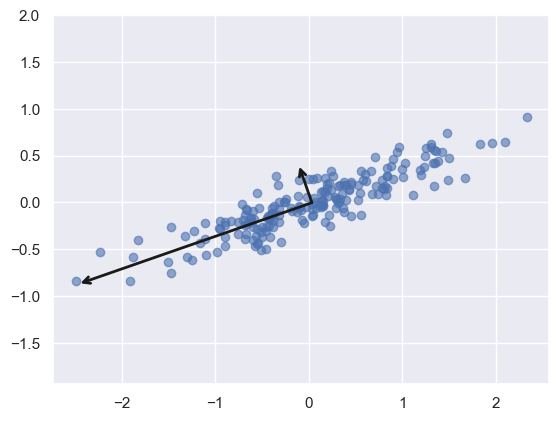

In [4]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
# plt.axis([-10,10,-15,15])

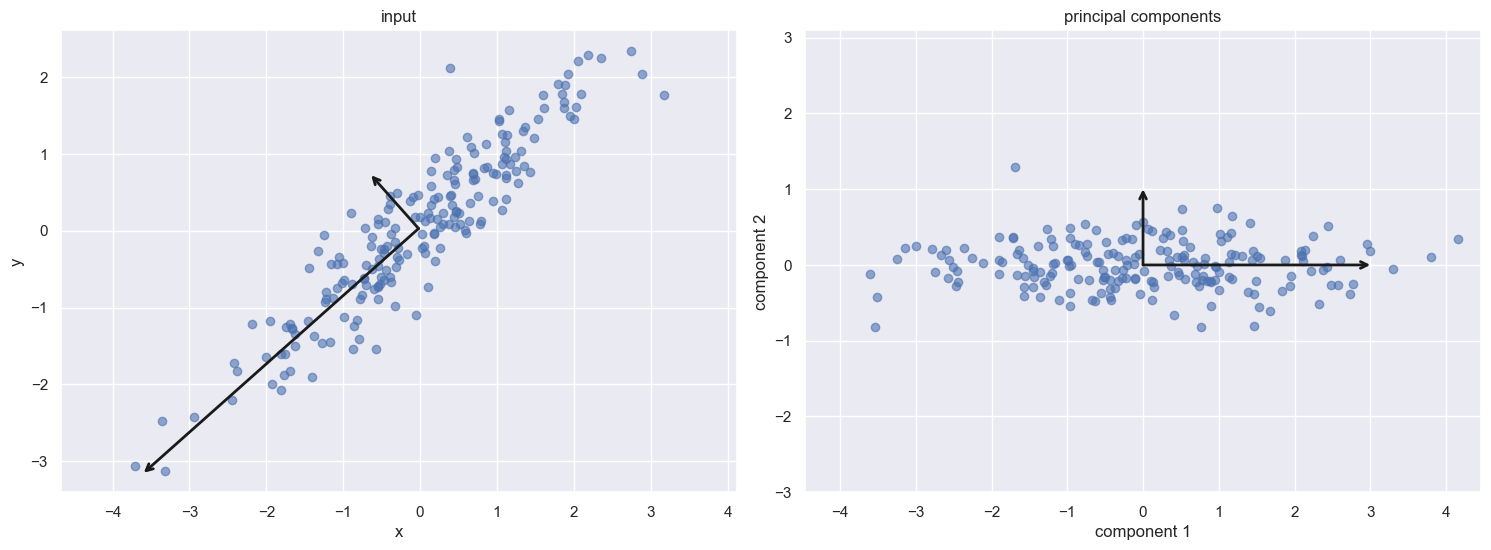

In [5]:
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=False)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.6)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
draw_vector([0, 0], [0, 1], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1));

## Si se desea reducir dimensión


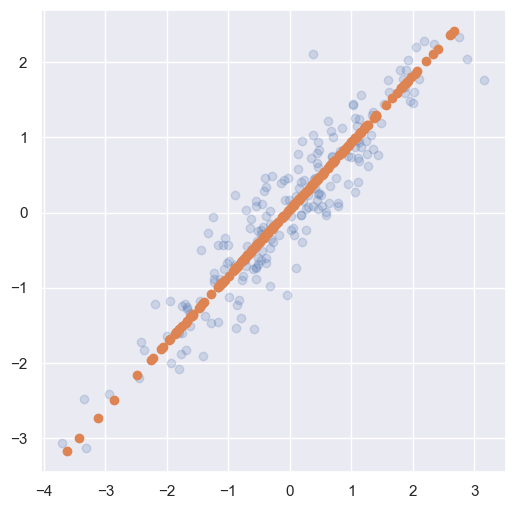

In [6]:
pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1])

In [7]:
from sklearn.datasets import load_iris 
X, y =  load_iris(return_X_y=True)
X.shape

(150, 4)

(150, 2)


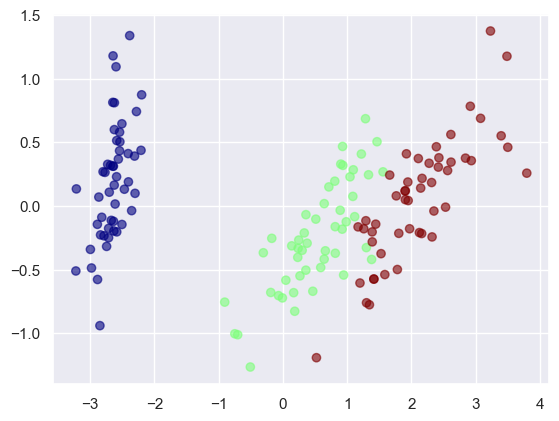

In [8]:
pca = PCA(n_components=2)
pca.fit(X)

X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.squeeze(), alpha=0.6, cmap='jet')
print(X_pca.shape)

## Pasos para realizar PCA

1. Centralizar los datos originales (restar la media por cada característica) para obtener un conjunto de datos centralizado $X_c$
2. Obtener Valores y Vectores propios de la matriz de covarianza
3. Ordenar los valores propios de mayor a menor y escoger los $d$ vectores propios que corresponden a los $d$ mayores valores propios. También se puede escoger el número de dimensiones $d$ según la varianza que se desea retener (más adelante)
4. Construir la matriz de proyección $V$ con los $d$ vectores propios seleccionados apilados por columna
5. Transformar el conjunto de datos centralizado $X_c$ con V para obtener un subespacio de dimensión $d$.

In [9]:
#Paso 1
X_c = X - X.mean(axis=0)
X_c.shape
print(X.mean(axis=0))
print(X_c.mean(axis=0))

[5.84333333 3.05733333 3.758      1.19933333]
[-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]


In [10]:
#Paso 2
cov = np.cov(X_c.T) # 4 x 4
print('Matriz de Covarianza\n',cov)

# eig_vecs, eig_vals,_ = np.linalg.svd(X_c.T)
eig_vals, eig_vecs = np.linalg.eig(cov)

print('\nVectores Propios \n', eig_vecs)
print('\nValores Propios \n', eig_vals)

# print('\n\nEigenvectors \n%s' %eig_vecsE)
# print('\nEigenvalues \n ', (eig_valsE*149)**(1/2))

Matriz de Covarianza
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

Vectores Propios 
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]

Valores Propios 
 [4.22824171 0.24267075 0.0782095  0.02383509]


In [11]:
print("traza matriz de covarianza: ",np.trace(cov))
print("traza matriz de covarianza: ", cov[0,0]+cov[1,1]+cov[2,2]+cov[3,3])
print("suma de los valores propios: ", np.sum(eig_vals))

# 100 --> 4.572957046979869
# ?   --> 4.22824171

print(f"{4.22824171*100/4.572957046979869}%")
print(f"{(eig_vals[0]+eig_vals[1])/np.sum(eig_vals)*100}%")

traza matriz de covarianza:  4.572957046979866
traza matriz de covarianza:  4.572957046979866
suma de los valores propios:  4.572957046979868
92.46187240688101%
97.76852063187948%


In [11]:
#Paso 3
print(eig_vals.shape)
order = eig_vals.argsort()[::-1]
print(order)

eig_vals, eig_vecs = eig_vals[order], eig_vecs[:,order]

(4,)
[0 1 2 3]


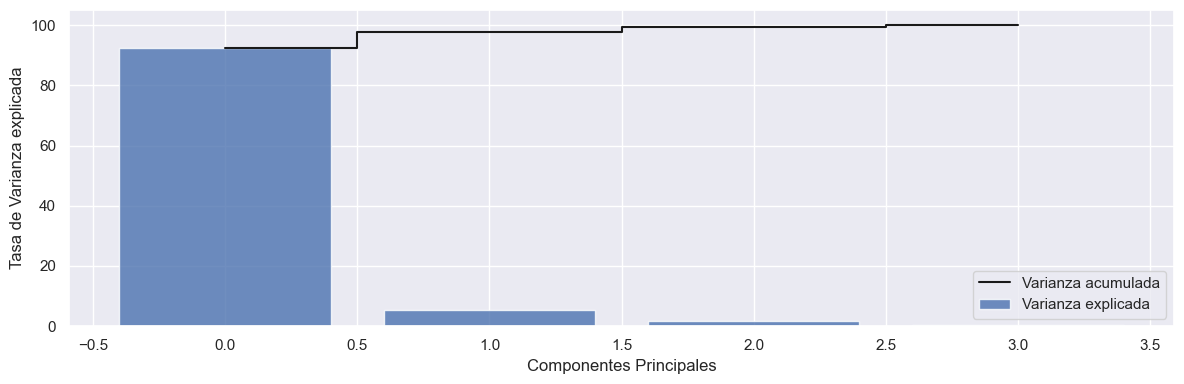

In [12]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(12, 4))

plt.bar(range(4), var_exp, alpha=0.8, align='center',
        label='Varianza explicada')
plt.step(range(4), cum_var_exp, where='mid',color='k',
         label='Varianza acumulada')
plt.ylabel('Tasa de Varianza explicada')
plt.xlabel('Componentes Principales')
plt.legend(loc='best')
plt.tight_layout()

In [13]:
eig_vecs[:,0].shape

(4,)

(150, 2)


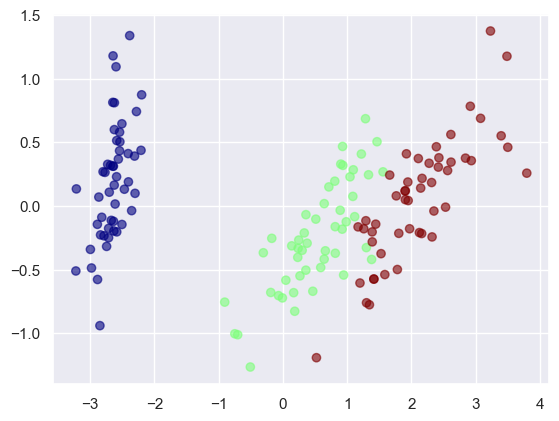

In [15]:
#Paso 4 y Paso 5
V = np.hstack((eig_vecs[:,0].reshape(4,1),
                      -eig_vecs[:,1].reshape(4,1)))
X_pca = X_c.dot(V)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.squeeze(), alpha=0.6, cmap='jet')
print(X_pca.shape)

# $$X_{pca} = X_c*V$$
# $$X_{pca}*V^{T} = X_c$$

(150, 4)


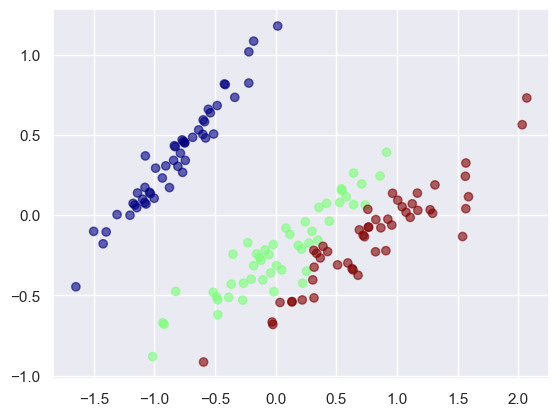

In [16]:
X_rec = X_pca.dot(V.T)
# X_rec = X_pca.dot(eig_vecs.T)
plt.scatter(X_rec[:, 0], X_rec[:, 1], c=y.squeeze(), alpha=0.6, cmap='jet')
print(X_rec.shape)

(150, 4)


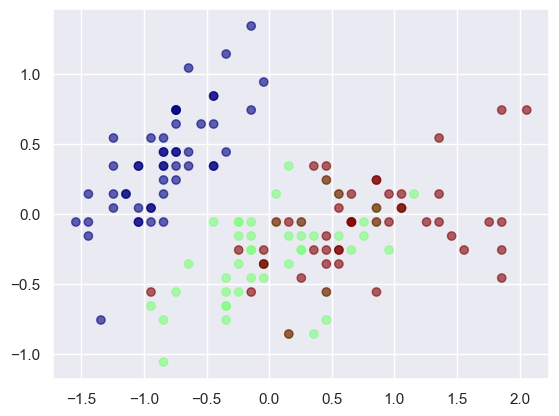

In [18]:
plt.scatter(X_c[:, 0], X_c[:, 1], c=y.squeeze(), alpha=0.6, cmap='jet')
print(X_c.shape)

# Reconstrucción

In [19]:
# from sklearn.decomposition import PCA
# import numpy as np
# import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

In [20]:
train_dataset = datasets.MNIST(root='data', #nombre de carpeta a crear
                               train=True, # True si se desea descargar conjunto de entrenamiento
                               transform=transforms.ToTensor(), # Se pasan a tipo Tensor de PyTorch
                                                        #ToTensor escala las imágenes de entrada al rango 0-1
                               download=True) # Si se desea descargar

In [21]:
x_train = train_dataset.data
print(x_train.shape)

y_train = train_dataset.targets
print(y_train.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [21]:
# from tensorflow.keras.datasets import mnist

# (x_train, y_train), _ = mnist.load_data()

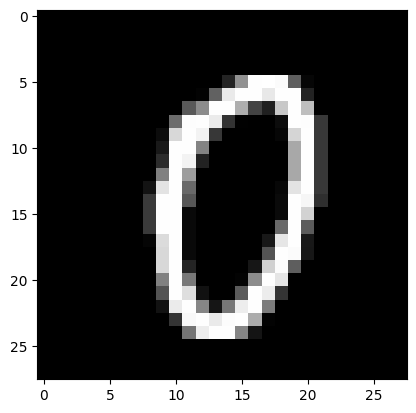

In [22]:
plt.imshow(x_train[1000], cmap='gray')
plt.show()

In [23]:
X = x_train.reshape(-1,784)
X.shape

torch.Size([60000, 784])

In [28]:
pca = PCA(.95)
X_pca = pca.fit_transform(X)
pca.n_components_

154

In [29]:
X_rec = pca.inverse_transform(X_pca)

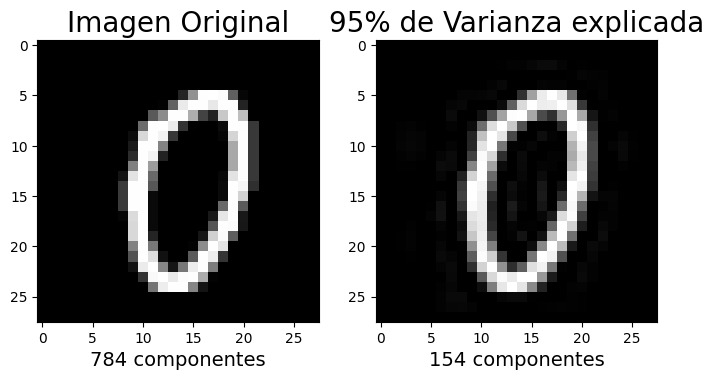

In [30]:
# Original Image
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1);
plt.imshow(X[1000].reshape(28,28),
          cmap = "gray");
plt.xlabel('784 componentes', fontsize = 14)
plt.title('Imagen Original', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(X_rec[1000].reshape(28, 28),
              cmap = "gray",
              clim=(0, 255));
plt.xlabel('154 componentes', fontsize = 14)
plt.title('95% de Varianza explicada', fontsize = 20)
plt.show()

In [31]:
X_c = X.numpy() - X.numpy().mean(axis=0)
print(X_c.shape)
cov = np.cov(X_c.T)

# eig_vecs, eig_vals,_ = np.linalg.svd(X_c.T)
eig_vals, eig_vecs = np.linalg.eig(cov)

print(eig_vals.shape)
order = eig_vals.argsort()[::-1]
print(order)

(60000, 784)
(784,)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  56  55  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  73  72  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  97  96  98  99 100 101 102 103 105 104 107 106
 108 109 110 112 111 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 130 129 132 134 135 136 133 131 137 138 140 139 141 142 144
 143 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 165 164 166 168 167 169 170 173 174 172 171 175 176 177 178 179
 180 182 183 181 185 186 187 184 188 192 189 191 193 190 197 198 196 195
 194 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 221 220 222 223 224 228 225 227 226 229 230 231 232 233
 235 234 236 237 238 239 241 24

In [32]:
eig_vals, eig_vecs = eig_vals[order], eig_vecs[:,order]

C:\Users\abelo\anaconda3\envs\IA_ITM\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\abelo\anaconda3\envs\IA_ITM\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


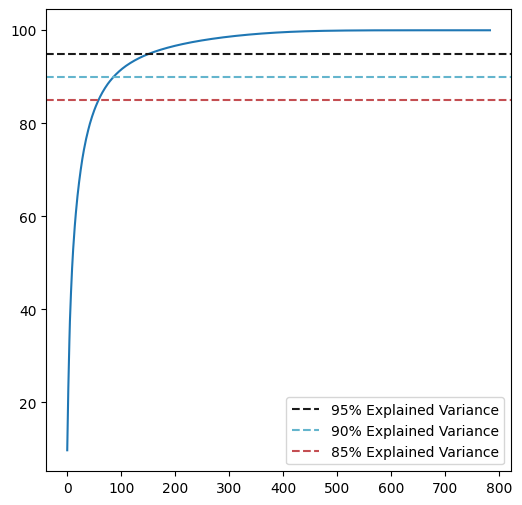

In [33]:
acum = np.cumsum(eig_vals)/np.sum(eig_vals)*100

plt.figure(figsize=(6,6))
plt.plot(acum)
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend()
plt.show()

In [45]:
por = 99.8
itemindex = np.where(acum>=por)[0][0]
itemindex

447

In [46]:
V = np.real(eig_vecs[:,:itemindex+1])

In [47]:
X_pca = X_c.dot(V)
X_pca.shape

(60000, 448)

In [48]:
X_rec = X_pca.dot(V.T)
X_rec.shape

(60000, 784)

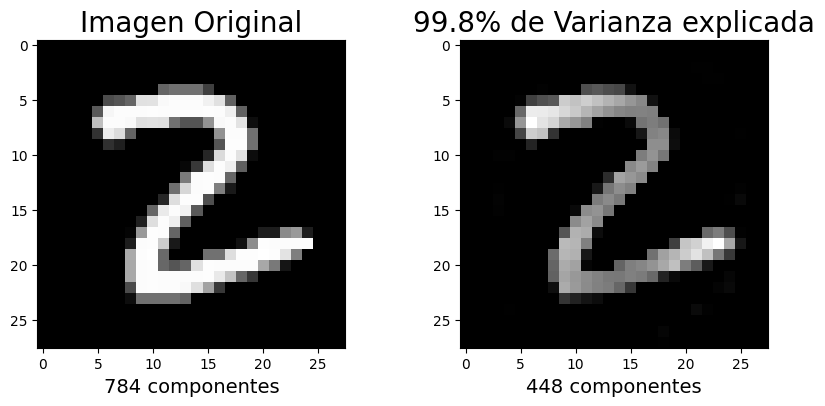

In [49]:
n = 830

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1);
plt.imshow(X[n].reshape(28,28),
          cmap = plt.cm.gray, interpolation='nearest',
          clim=(0, 255));
plt.xlabel('784 componentes', fontsize = 14)
plt.title('Imagen Original', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(X_rec[n].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel(str(itemindex+1)+' componentes', fontsize = 14)
plt.title(str(por) + '% de Varianza explicada', fontsize = 20)

plt.show()

In [50]:
X_ruid = np.random.normal(x_train,18)
print(X_ruid.shape)

(60000, 28, 28)


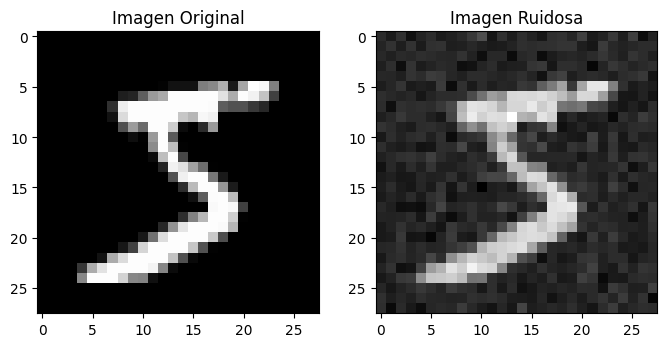

In [51]:
n = 0

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(x_train[n], cmap='gray')
plt.title('Imagen Original')

plt.subplot(1,2,2)
plt.imshow(X_ruid[n], cmap='gray')
plt.title('Imagen Ruidosa')

plt.show()

In [52]:
X = X_ruid.reshape(-1,784)
X_c = X - X.mean(axis=0)
print("Tamaño de los datos: ", X_c.shape)
cov = np.cov(X_c.T)

# eig_vecs, eig_vals,_ = np.linalg.svd(X_c.T)
eig_vals, eig_vecs = np.linalg.eig(cov)

order = eig_vals.argsort()[::-1]
eig_vals, eig_vecs = eig_vals[order], eig_vecs[:,order]

por = 98
itemindex = np.where(acum>=por)[0][0]
itemindex

V = np.real(eig_vecs[:,:itemindex+1])

X_pca = X_c.dot(V)
print("Tamaño de los datos proyectados: ",X_pca.shape)

X_rec = X_pca.dot(V.T)
print("Tamaño de los datos reconstruidos: ",X_rec.shape)

Tamaño de los datos:  (60000, 784)
Tamaño de los datos proyectados:  (60000, 261)
Tamaño de los datos reconstruidos:  (60000, 784)


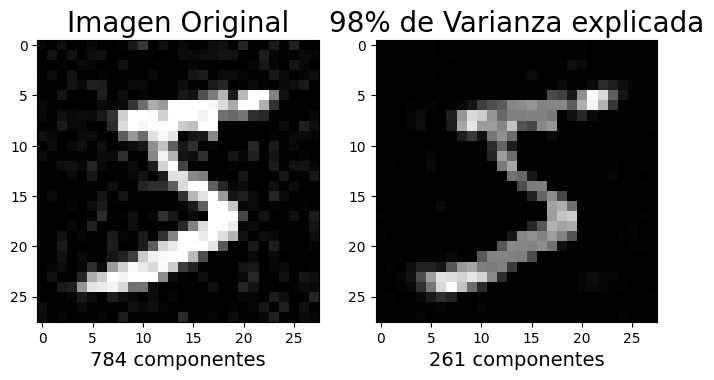

In [53]:
n = 0

plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1);
plt.imshow(X[n].reshape(28,28),
          cmap = plt.cm.gray, interpolation='nearest',
          clim=(0, 255));
plt.xlabel('784 componentes', fontsize = 14)
plt.title('Imagen Original', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(X_rec[n].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel(str(itemindex+1)+' componentes', fontsize = 14)
plt.title(str(por) + '% de Varianza explicada', fontsize = 20)
plt.show()

In [54]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [70]:
pca = PCA(150)
pca = pca.fit(faces.data)

In [71]:
fig, axes = plt.subplots(3, 8, figsize=(8, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

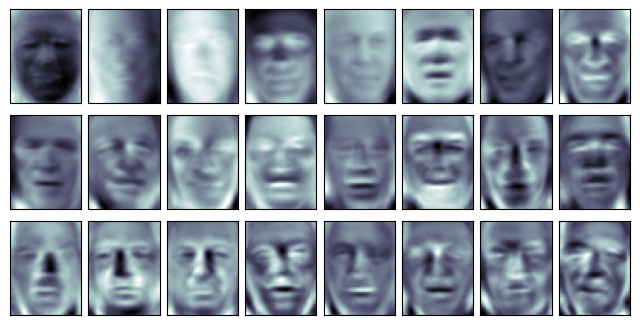

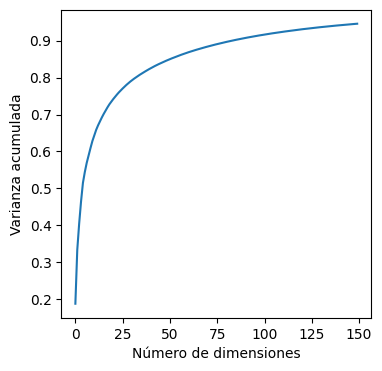

In [72]:
plt.figure(figsize=(4,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de dimensiones')
plt.ylabel('Varianza acumulada')
plt.show()

In [73]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

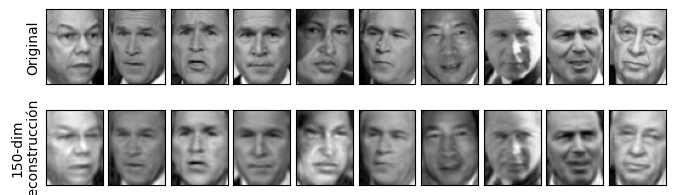

In [74]:
fig, ax = plt.subplots(2, 10, figsize=(8, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('Original')
ax[1, 0].set_ylabel('150-dim\nreconstrucción')
plt.show()